# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
# Your code here
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
insurance_customers_df=pd.read_csv(url)


In [2]:
#To work better with our columns we are going to convert the titles to lowercase 
insurance_customers_df.columns=map(str.lower,insurance_customers_df.columns)

In [3]:
#And remove the blank space btw words
insurance_customers_df.columns=insurance_customers_df.columns.str.replace(" ","_")

In [4]:
#Change  st for state 
insurance_customers_df['st']=insurance_customers_df['st'].str.replace('st','state')


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
# Standarize gender column to "F" and "M"
insurance_customers_df['gender']=insurance_customers_df['gender'].replace({'Femal':'F','female':'F','Male':'M'})

In [6]:
#Standarize education column, when "Bachelors" change for "Bachelor"
insurance_customers_df['education']=insurance_customers_df['education'].replace({'Bachelors':'Bachelor'})

In [7]:
#Standarize vehicle_class column
# "Sports Car", "Luxury SUV", "Luxury Car" replace with "Luxury"
insurance_customers_df['vehicle_class']=insurance_customers_df['vehicle_class'].replace({'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'})

In [8]:
#Delete the % character from customer lifetime value column
insurance_customers_df['customer_lifetime_value']=insurance_customers_df['customer_lifetime_value'].str.replace('%','').astype(float)/100

In [9]:
#Let's check the columns with changes
#Gender column
insurance_customers_df['gender'].unique()
print(insurance_customers_df['gender'].unique())
#The changes have been made, or values are 'F' , 'M' and nan values (to be clean later on)


[nan 'F' 'M']


In [10]:
#Let's check the columns with changes
#education column
insurance_customers_df['education'].unique()
print(insurance_customers_df['education'].unique())
#The changes have been done succesfully
#Note : there are nan values to adress later on

['Master' 'Bachelor' 'High School or Below' 'College' 'Doctor' nan]


In [11]:
#Let's check the columns with changes
#Vehicle class column
insurance_customers_df['vehicle_class'].unique()
print(insurance_customers_df['vehicle_class'].unique())
#The changes have been done succesfully
#Note : there are nan values to adress later on

['Four-Door Car' 'Two-Door Car' 'SUV' 'Luxury' nan]


In [12]:
#Let's check the columns with changes
#customer lifetime value column
insurance_customers_df['customer_lifetime_value'].unique()
print(insurance_customers_df['customer_lifetime_value'].unique())

[       nan  6979.5359 12887.4317 ... 20314.9976  3239.1247  8997.0402]


In [13]:
#Change state abbreviations to full name
change_states={'AZ':'Arizona','Cali':'California','WA':'Washington'}
insurance_customers_df['st']=insurance_customers_df['st'].replace(change_states)

In [14]:
insurance_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   st                         1071 non-null   object 
 2   gender                     954 non-null    object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1068 non-null   float64
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   object 
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(4), object(7)
memory usage: 344.6+ KB


## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [15]:
#Observe the characteristics of the variable Number of Open Complaints with unique()
insurance_customers_df['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [16]:
#Using only the number on the middle
#link:https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html#pandas.Series.str.split
insurance_customers_df['number_of_open_complaints'] = insurance_customers_df['number_of_open_complaints'].astype(str).str.split("/").str[1]




In [17]:
#We can check how the column is transforming
insurance_customers_df['number_of_open_complaints'].unique()

array(['0', '2', '1', '3', '5', '4', nan], dtype=object)

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [18]:
#Checking for Nan values in each column
insurance_customers_df.isna().any()
#As we can see all columns have Nan values 

customer                     True
st                           True
gender                       True
education                    True
customer_lifetime_value      True
income                       True
monthly_premium_auto         True
number_of_open_complaints    True
policy_type                  True
vehicle_class                True
total_claim_amount           True
dtype: bool

In [19]:
#It's is useful to know how many Nan values are in each column
insurance_customers_df.isna().sum()
#The number of Nan values is high in all cases, close to 70% 
#The column with more Nan values is the 'gender' column
#Deleting such a high number of datapoints could potentially harm our analysis



customer                     2937
st                           2937
gender                       3054
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

In [20]:
#Thoughts going forward
#We want to save as much information as possible.
#At the same time if there are too many missing values for the same observation, it's not worth saving it
#link:https://saturncloud.io/blog/how-to-count-the-number-of-missingnan-values-in-each-row-in-python-pandas/#:~:text=(axis%3D1)-,To%20count%20the%20number%20of%20missing%2FNaN%20values%20in%20each,True%20indicates%20a%20missing%20value.
row_nan_count = insurance_customers_df.isna().sum(axis=1)

print(row_nan_count)

0        2
1        0
2        0
3        0
4        0
        ..
4003    11
4004    11
4005    11
4006    11
4007    11
Length: 4008, dtype: int64


In [21]:
#As we can see there are observations with all their values blank and some with just one or two
#We can set a limit, if they have more than five values, they are dropped
#link:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
insurance_customers_df=insurance_customers_df.dropna(thresh=6) # Keep only the rows with at least 6 non-NA values

In [22]:
#Let's check again if we have any Nan values to clean
insurance_customers_df.isna().any()
#We can see that we still have Nan values in the columns 'gender' and 'customer lifetime value'


customer                     False
st                           False
gender                        True
education                    False
customer_lifetime_value       True
income                       False
monthly_premium_auto         False
number_of_open_complaints    False
policy_type                  False
vehicle_class                False
total_claim_amount           False
dtype: bool

In [23]:
#It's is useful to know how many Nan values are in each column
insurance_customers_df.isna().sum()

customer                       0
st                             0
gender                       117
education                      0
customer_lifetime_value        3
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

In [25]:
#To handle the remaining cases of missing data, we are going to fill in the missing values.
#As we have allready lost to many observation because of the null values.
#In the case of gender, which has the most missing values we are going to replace it with the most frequent.
#In the case of customer lifetime value we are going to replace it with the mean value.
#Link: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
imp_constant_cat=SimpleImputer(strategy='constant', fill_value="U")

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [26]:
insurance_customers_df=insurance_customers_df.drop_duplicates(keep='last')

In [27]:
insurance_customers_df.to_csv("insurance_customers_df_clean.csv")

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [ ]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [ ]:
#Get the data
#For this lab, we will continue using the csv file that was downloaded in the previous lab as well as the Jupyter Notebook.


#EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
#Show DataFrame info.
#Describe DataFrame.
#Show a plot of the Gender breakdown.
#Show a plot of Income by State.
#Show a plot of the Policy Type by the Total Claim Amount.
#Show a plot of the Education by Vehicle Class.
#What insights can you establish from these plots?
#What other plots do you feel would be beneficial?

In [28]:
#Use the clean dataframe from the previous exercise
#Show DataFrame info (check we are using the correct dataframe with changes)
insurance_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   st                         1071 non-null   object 
 2   gender                     954 non-null    object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1068 non-null   float64
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   object 
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(4), object(7)
memory usage: 100.4+ KB


In [29]:
#Seeing the above table we get a feeling that there might be more null values in gender
#we have to options to drop them or to fill them
insurance_customers_df=insurance_customers_df.dropna(subset=['gender'])

In [30]:
#Let's check 
insurance_customers_df.info()
#Now we know that there are no extra missing values in gender

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 1 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   954 non-null    object 
 1   st                         954 non-null    object 
 2   gender                     954 non-null    object 
 3   education                  954 non-null    object 
 4   customer_lifetime_value    952 non-null    float64
 5   income                     954 non-null    float64
 6   monthly_premium_auto       954 non-null    float64
 7   number_of_open_complaints  954 non-null    object 
 8   policy_type                954 non-null    object 
 9   vehicle_class              954 non-null    object 
 10  total_claim_amount         954 non-null    float64
dtypes: float64(4), object(7)
memory usage: 89.4+ KB


In [31]:
#Describe DataFrame.
insurance_customers_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,952.000000,954.000000,954.000000,954.000000
mean,7942.012863,39575.926625,204.967505,404.432066
std,6258.791614,30716.703798,1695.980015,299.211349
min,2004.350700,0.000000,61.000000,0.382107
25%,4117.835800,13364.750000,68.000000,194.621742
50%,5885.745300,36641.500000,83.000000,350.400000
75%,9037.509150,64948.000000,110.000000,532.800000
max,44795.469400,99960.000000,35354.000000,2893.239678


In [32]:
#Before using graphs, import the necessary tools

import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

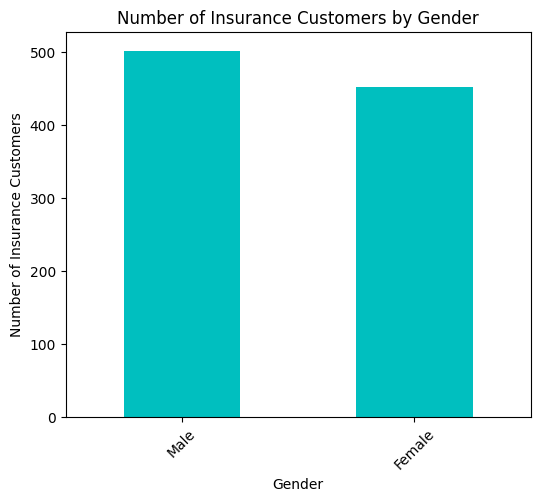

In [33]:
#Show a plot of the Gender breakdown.
#link :https://stackoverflow.com/questions/70664177/better-way-to-plot-gender-count-using-python
gender = insurance_customers_df['gender'].value_counts()
plt.figure(figsize=(6, 5))
ax = gender.plot(kind='bar', rot=45, color="c")
ax.set_title("Number of Insurance Customers by Gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Insurance Customers')
ax.set_xticklabels(('Male', 'Female'))
#Looking at the graph we can see that there isn't a great difference btw 'female' and 'male'.
#A possibility explaining the difference is that some families might have just one car, and the policy is under the husband's name.

Text(0, 0.5, 'State')

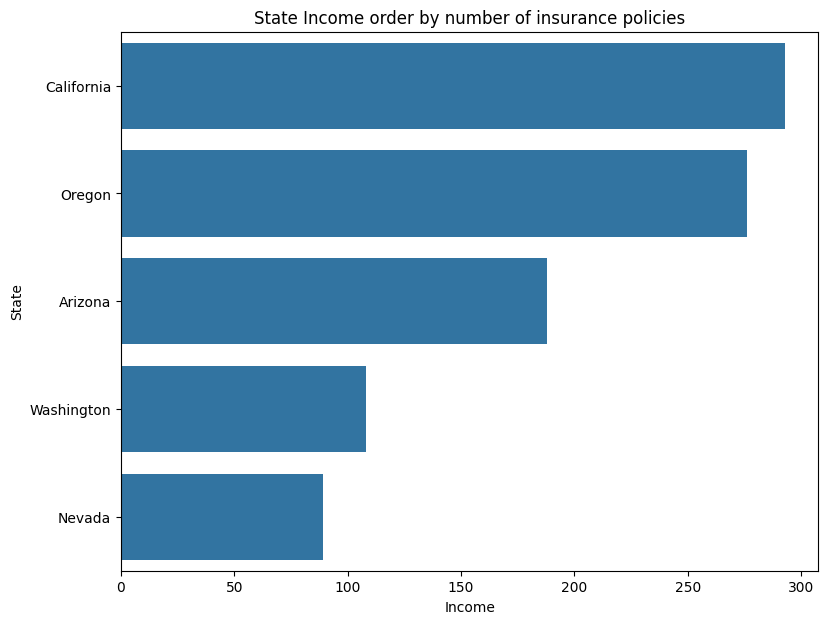

In [34]:
#Show a plot of Income by State.
#Note: using a 9:7 size chart instead of the previous 6:5 because there are more variables
st_order = insurance_customers_df['st'].value_counts().head(5).index
plt.figure(figsize=(9, 7))
sns.countplot(data=insurance_customers_df, y='st', order=st_order)
plt.title('State Income order by number of insurance policies')
plt.xlabel('Income')
plt.ylabel('State')
#link: https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [35]:
#Checking the order of the graph 
insurance_customers_df['st'].value_counts()
#Observation 1: the state with the largest number of insurance policies is the state with the largest income
#Observation 2: Oregon and California have pretty similar numbers
#Observation 3: Washington and Nevada have similar numbers
#Observation 4: Arizona has mid-tier values, that do not asimilate to the other two groups
#IDEAS to explore: Maybe there are three sub-categories: high, medium and low 

st
California    293
Oregon        276
Arizona       188
Washington    108
Nevada         89
Name: count, dtype: int64

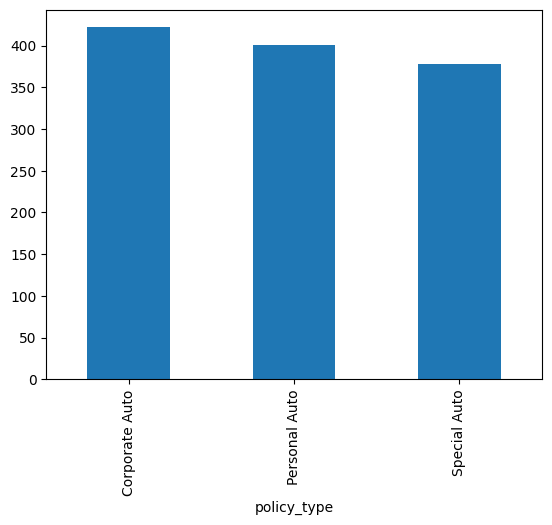

In [36]:
#Show a plot of Total Claim Amount by policy type.
#Use mean values because there are to many values
#Note: mainteining size chart (9:7)
TotalCA_df = insurance_customers_df.groupby(['policy_type'])['total_claim_amount'].mean()
ax = TotalCA_df.plot.bar(x='policy_type', y='total_claim_amount(mean values)', rot=90)
#Observation 1: The isn't a drastic difference btw policy types
#Observation 2: We are missing the 'luxury' category, that has been drop because it had to many missing values
#Thoughts : it would be intersting to explore the luxury category alone, also i might be intersting to break down this graph by state

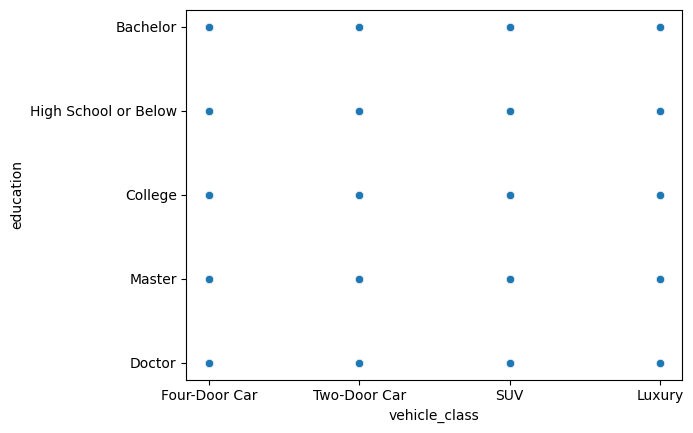

In [37]:
#Show a plot of the Education by Vehicle Class.
sns.scatterplot(x='vehicle_class',y='education',data=insurance_customers_df)
plt.show()


In [38]:
#What insights can you establish from these plots?
#There is a strong difference in income by state
#The average claim amount is not so sensitive to the policy type, the corporate premium is small
#The difference btw women and men is small; but I might by good to check if this holds the same in all markets (states)

In [39]:
#What other plots do you feel would be beneficial?
#It would be benefitial to do an histogram plot for each variable, to learn their distribution and see if there are outliers
#It would be beneficial to analyze the correlation btw variables

In [40]:
#Use the jupyter file from the last lab (Customer Analysis Round 4)

#You do NOT need to fork and clone this lab.
#Complete the following task
##Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
#Use Matplotlib to construct histograms
#Do the distributions for different numerical variables look like a normal distribution?
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [41]:
#Check the data types of the columns
insurance_customers_df.dtypes

customer                      object
st                            object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [42]:
# Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. 
#(You can use np.number and object to select the numerical data types and categorical data types respectively)
numeric_dataIC = insurance_customers_df.select_dtypes(include=[np.number])
categorical_dataIC = insurance_customers_df.select_dtypes(exclude=[np.number])



In [43]:
#Let's check the numerical dataframe
numeric_dataIC.info()


<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 1 to 1070
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  952 non-null    float64
 1   income                   954 non-null    float64
 2   monthly_premium_auto     954 non-null    float64
 3   total_claim_amount       954 non-null    float64
dtypes: float64(4)
memory usage: 37.3 KB


In [44]:
#Let's check the categorical dataframe
categorical_dataIC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 1 to 1070
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer                   954 non-null    object
 1   st                         954 non-null    object
 2   gender                     954 non-null    object
 3   education                  954 non-null    object
 4   number_of_open_complaints  954 non-null    object
 5   policy_type                954 non-null    object
 6   vehicle_class              954 non-null    object
dtypes: object(7)
memory usage: 59.6+ KB


In [ ]:
#Now we will try to check the normality of the numerical variables visually


In [ ]:
#Use seaborn library to construct distribution plots for the numerical variables
#link: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
#link:https://seaborn.pydata.org/generated/seaborn.scatterplot.html


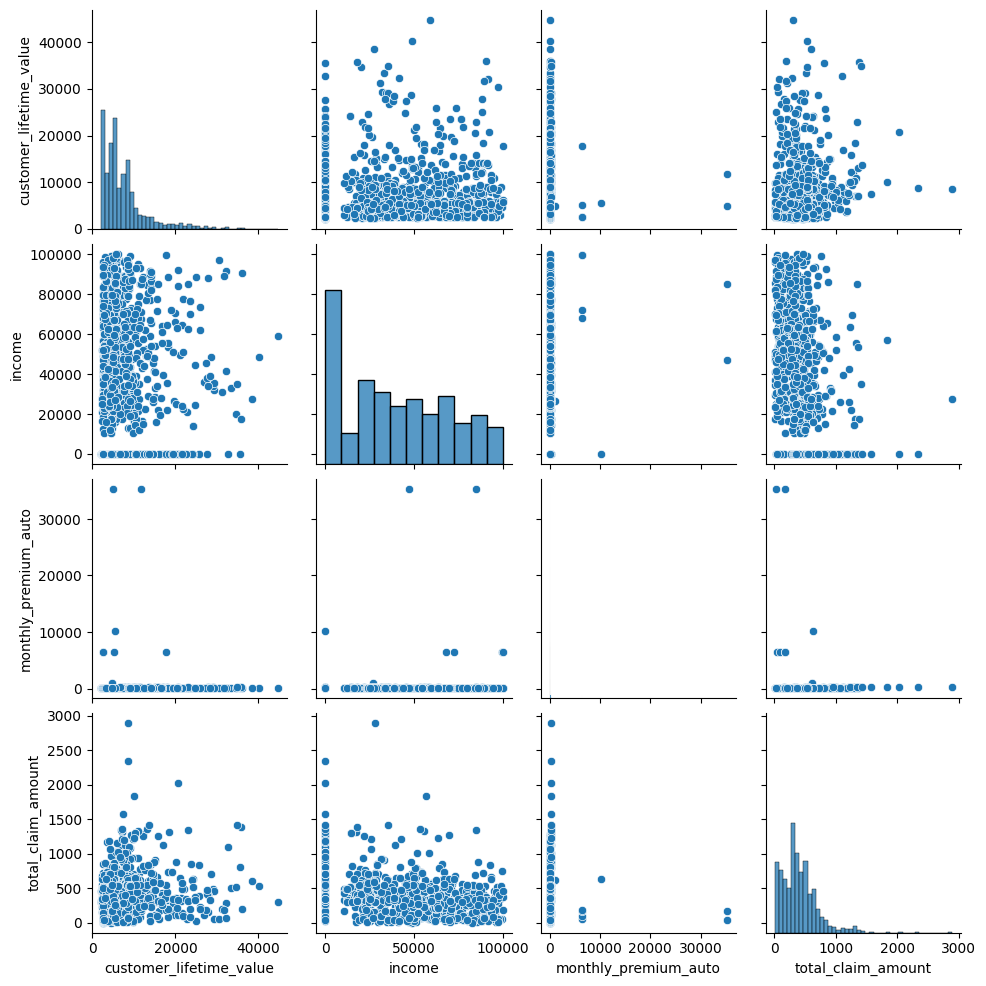

In [45]:
sns.pairplot(numeric_dataIC)

In [ ]:
#As we seen in the graphs above both income and total_claim_amont have what appears to be a log-normal distribution
#This resonates specially for income.
#link: https://towardsdatascience.com/log-normal-distribution-a-simple-explanation-7605864fb67c
# A log-normal distributions implies a long tail to the right

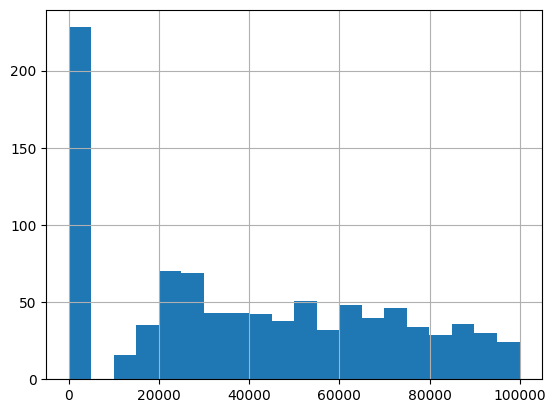

In [46]:
#Histogram for income
numeric_dataIC['income'].hist(bins=20)
plt.show()

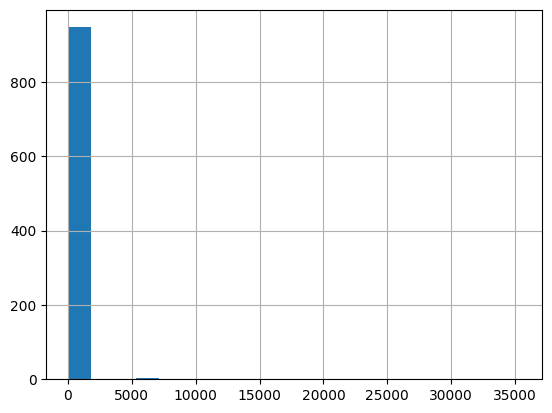

In [47]:
#Histogram for monthly premium auto
numeric_dataIC['monthly_premium_auto'].hist(bins=20)
plt.show()

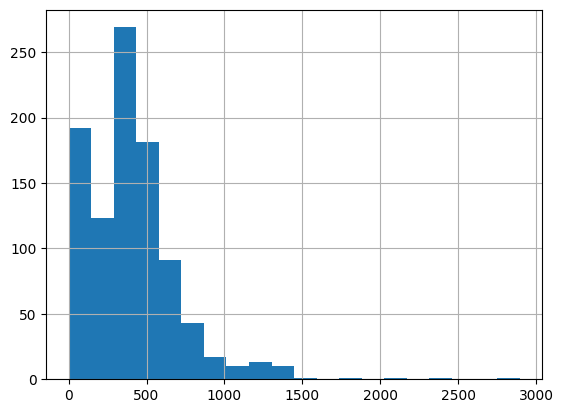

In [48]:
#Histogram for monthly premium auto
numeric_dataIC['total_claim_amount'].hist(bins=20)
plt.show()

In [ ]:
#Do the distributions for different numerical variables look like a normal distribution?
#The income distribution is not continuous and appears to have a shape similar to a log-normal distribution
#The monthly premium auto doesn't have and identifiable distribution.
#The total claim amount has a continuous log-normal distribution 


In [ ]:
#For the numerical variables, check the multicollinearity between the features.
# Please note that we will use the column total_claim_amount later as the target variable.
#Note 1: The Pearson’s correlation coefficient metric directly evaluates the strength of the relationship between two variables. 
#Note 2: Its values range between -1 and 1.

In [49]:
#Create correlation matrix to check pearson coeficient
correlations_matrix = numeric_dataIC.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.030614,0.004180,0.139519
income,0.030614,1.000000,0.051825,-0.366079
monthly_premium_auto,0.004180,0.051825,1.000000,-0.041816
total_claim_amount,0.139519,-0.366079,-0.041816,1.000000


In [ ]:
#The results shows that there is not a strong multicolinearity btw variables.
#link:https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b

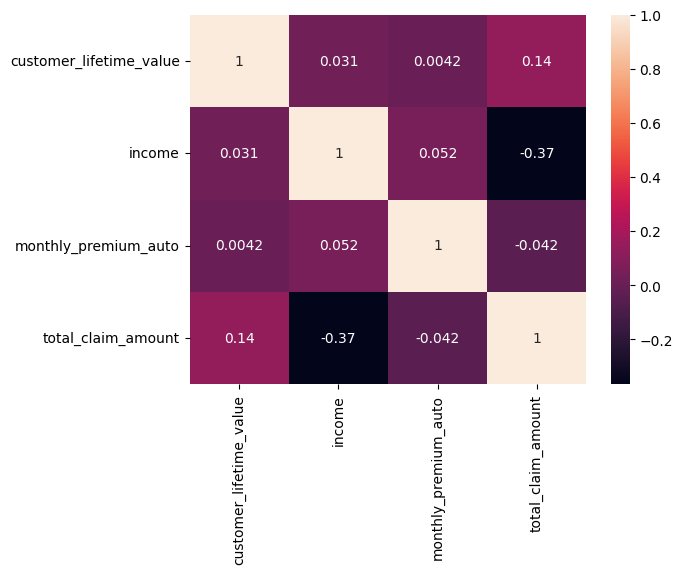

In [50]:
#A visual representation of the matrix
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#Income and total claim amount have a significant negative correlation
#Customer lifetime value and total claim amount have a postive small correlation
#The rest of the variables don't present a significant correlation

In [ ]:
#Round Five
##For this lab, we continue using the csv file that that was previously downloaded and the same Jupyter notebook from the previous rounds. 
#There is NO NEED to fork and clone this repository.

#Dealing with the data
#Already done in the round 2.

#Explore the data
#Done in the round 3.

#Processing Data
#(Further processing...)

#X-y split. Remember that at this time yoou need the complete dataset, both numerical and categorical in the X features.
#X split into X_numerical and X_categorical
#Scaling (X_numerical).

In [51]:
#Import necessary libraries and tools (for later)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler


In [52]:
#On round 4 it was specified that 'total_claim_amount'  would be the target variable.

y = insurance_customers_df['total_claim_amount']
X = insurance_customers_df.drop(['total_claim_amount','customer'], axis=1) #removing customer as well

In [53]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [54]:
#Scaling (X_numerical).
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
insurance_df_numerical=pd.DataFrame(x_standardized, columns=X_num.columns)


(954, 3)


In [55]:
insurance_df_numerical=pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

In [56]:
insurance_df_numerical.head(10).T

,customer_lifetime_value,income,monthly_premium_auto
count,9.520000e+02,9.540000e+02,9.540000e+02
mean,-2.985474e-17,1.266166e-16,-2.793014e-18
std,1.000526e+00,1.000525e+00,1.000525e+00
min,-9.491901e-01,-1.289093e+00,-8.493203e-02
25%,-6.113300e-01,-8.537676e-01,-8.080245e-02
50%,-3.287134e-01,-9.558206e-02,-7.195337e-02
75%,1.751252e-01,8.264357e-01,-5.602502e-02
max,5.891365e+00,1.966869e+00,2.073578e+01


In [ ]:
#Round 6
#Processing Data
#(Further processing...)

#X-y split. (done) Round 5
#Scaling (numerical). (done) Round 5
#Round 6
#One Hot/Label Encoding (categorical).
#Concat DataFrames
#Linear Regression
#Train-test split.
#Apply linear regression.
#Model Validation
#Description:
#R2.
#MSE.
#RMSE.
#MAE.

In [57]:
#One Hot/Label Encoding (categorical).
#We are not going to use "customer"  and "state" inside the categorical values
categorical_cols = ['gender', 'education','number_of_open_complaints', 'policy_type','vehicle_class',] 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



In [83]:
ohe = OneHotEncoder()
array_hot_encoded = ohe.fit_transform(insurance_customers_df[categorical_cols]).toarray()


In [ ]:
cols = array_hot_encoded.get_feature_names_out(input_features=df.columns)

In [59]:
#Display the array to check that the transformation is correct
array_hot_encoded

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [60]:
# The categories corresponding to each of the categorical columns encoded
ohe.categories_

[array(['F', 'M'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['0', '1', '2', '3', '4', '5'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]

In [61]:
#Convert it to df
insurance_customers_df_hot_encoded = pd.DataFrame(array_hot_encoded,index=insurance_customers_df.index)

In [62]:
insurance_customers_df_hot_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1067,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1068,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1069,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
df=pd.concat([insurance_df_numerical.T,insurance_customers_df_hot_encoded],axis=1)
df.head(10)

,customer_lifetime_value,income,monthly_premium_auto,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
count,9.520000e+02,9.540000e+02,9.540000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-2.985474e-17,1.266166e-16,-2.793014e-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.000526e+00,1.000525e+00,1.000525e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-9.491901e-01,-1.289093e+00,-8.493203e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-6.113300e-01,-8.537676e-01,-8.080245e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-3.287134e-01,-9.558206e-02,-7.195337e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.751252e-01,8.264357e-01,-5.602502e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.891365e+00,1.966869e+00,2.073578e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
#Checking on our vertical axis
y = insurance_customers_df['total_claim_amount']
y.head()

1    1131.464935
2     566.472247
3     529.881344
4      17.269323
5     159.383042
Name: total_claim_amount, dtype: float64

In [65]:
#Linear Regression
#Train-Test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#Checking the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(763, 9)
(191, 9)
(763,)
(191,)


In [67]:

#Some problems appear when trying to perform a linear regression, saying that the content of a particular column could not be transformed to numeric.
#In order to repear this problem a transformation to numeric was done on all variables
#link: https://stackoverflow.com/questions/52751718/name-linear-model-is-not-defined
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
X_train= X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
X_test= X_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')
X_test.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [68]:
#train/fit the model
import sklearn
from sklearn import linear_model
lr= linear_model.LinearRegression()



In [69]:
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
#R2 score
from sklearn.metrics import r2_score
predictions = lr.predict(X_train)
r2_score(y_train, predictions)
# The r2 score is low, it may indicate that our prective model with all its variables is not the best fit
#This was sort of expected, as we have seen with the graphics not all variables present a normal distribution or ar fitted for a linear regression.
#It's also important to note that we only perform a visual check (heatmap) on multicolinearity on the numerical variables.
# We migth need to address the multicolinearity in the categorical variables
#A model with less variables might be a better fit or maybe it's needs another type of regression that it's not linear.

0.13470818277640995

In [71]:
X_test_transpose= X_test.T

In [72]:
predictions

array([645.28461817, 355.35391807, 497.25167722, 428.27110175,
       243.92799297, 593.03759458, 508.50761058, 637.5491295 ,
       537.93581472, 391.38644571, 371.5420637 , 224.22309539,
       525.39113473, 446.10929671, 538.67883969, 636.72953142,
       513.6003437 , 411.60261888, 330.68860818, 400.5845505 ,
       524.02720319, 422.98038919, 431.59028285, 418.76852812,
       260.50363483, 412.92467119, 330.68860818, 589.71535377,
       453.40881477, 448.54022602, 304.06294931, 255.90794048,
       535.52790434, 348.22543988, 459.46928578, 319.58158629,
       334.29737972, 342.3522654 , 500.56766446, 445.68635176,
       415.85201177, 498.22725073, 507.84284428, 328.74537471,
       526.13073368, 289.13609711, 526.85589407, 510.81612799,
       320.65186819, 462.22113086, 425.3616089 , 235.22795507,
       456.55343557, 320.25698959, 527.83188265, 252.05319277,
       260.23008161, 194.47132112, 377.58421413, 343.98385736,
       351.50223779, 339.20700673, 358.33205026, 585.03

In [ ]:
#Round 7
#Explore the data
#Already done.

#Modeling
#Description:

#Try to improve the linear regression model. Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model.

#Some approaches you can try in this exercise:
#use the concept of multicollinearity and remove insignificant variables
#use a different method of scaling the numerical variables
#use a different ratio of train test split
#use the transformation on numerical columns which align it more towards a normal distribution

In [75]:
#use the concept of multicollinearity and remove insignificant variables
#Create correlation matrix to check pearson coeficient
#Before, we analyze the correlation matrix of only the numerical variables, this time the complete matrix with dummies.
correlations_matrix = df.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
customer_lifetime_value,1.000000,0.999991,0.999884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,0.999991,1.000000,0.999811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_premium_auto,0.999884,0.999811,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,1.000000,-1.000000,-0.041610,0.005486,-0.026993,0.030726,0.028143,...,0.022691,0.039100,0.010728,-0.040614,0.030030,0.015141,0.015516,-0.019926,0.015106,-0.020335
1,NaN,NaN,NaN,-1.000000,1.000000,0.041610,-0.005486,0.026993,-0.030726,-0.028143,...,-0.022691,-0.039100,-0.010728,0.040614,-0.030030,-0.015141,-0.015516,0.019926,-0.015106,0.020335
2,NaN,NaN,NaN,-0.041610,0.041610,1.000000,-0.425932,-0.129290,-0.410869,-0.205859,...,0.024219,-0.038595,0.014972,0.019958,-0.009052,-0.018670,0.027579,-0.026799,-0.009334,-0.006496
3,NaN,NaN,NaN,0.005486,-0.005486,-0.425932,1.000000,-0.125466,-0.398716,-0.199770,...,0.001442,0.043690,0.049075,0.034936,-0.041692,0.018194,0.002004,-0.010413,0.033353,-0.028100
4,NaN,NaN,NaN,-0.026993,0.026993,-0.129290,-0.125466,1.000000,-0.121029,-0.060640,...,-0.033306,0.025156,-0.014165,-0.009956,0.020574,-0.022296,0.004053,0.018892,-0.008099,-0.010606
5,NaN,NaN,NaN,0.030726,-0.030726,-0.410869,-0.398716,-0.121029,1.000000,-0.192705,...,0.007056,0.007850,-0.045016,-0.037278,0.042189,-0.014891,-0.014593,0.032753,-0.034301,0.028998
6,NaN,NaN,NaN,0.028143,-0.028143,-0.205859,-0.199770,-0.060640,-0.192705,1.000000,...,-0.030724,-0.036522,-0.022554,-0.022983,0.001302,0.039456,-0.027651,-0.004045,0.021214,0.016864


<Axes: >

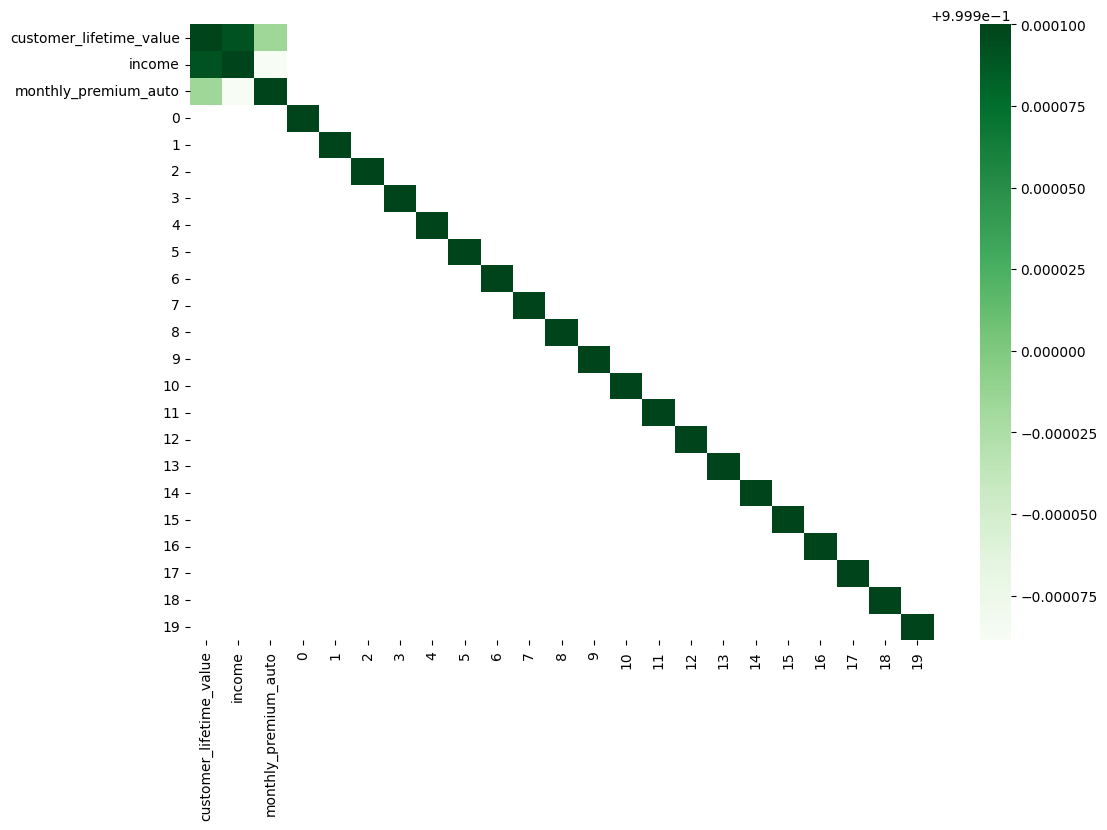

In [77]:
#We create a correlation matrix thah highlights the cases with strong correlation.
#We recomend keeping only customer lifetime value and income.
corr = df.corr()
kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")
#link:https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [78]:
#use a different method of scaling the numerical variables
#First, we are going to transform the dataframe and remove the variables that don't have a relevant correlation
#And we also remove the variable that we are using as 'y' from the X matrix.

y = insurance_customers_df['total_claim_amount']
X = insurance_customers_df.drop(['total_claim_amount','customer','monthly_premium_auto'], axis=1)

In [79]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [87]:
#Some problems appear when trying to perform a linear regression, saying that the content of a particular column could not be transformed to numeric.
#In order to repear this problem a transformation to numeric was done on all variables
#link: https://stackoverflow.com/questions/52751718/name-linear-model-is-not-defined
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
X_train= X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
X_test= X_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')
X_test.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaleMinMax = MinMaxScaler(feature_range=(0,1))
X=scaleMinMax.fit_transform(X)
X=pd.DataFrame(X)

In [89]:
#train/fit the model

import sklearn
from sklearn import linear_model
lr= linear_model.LinearRegression()

In [93]:
#use a different ratio of train test split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state= 42,test_size=0.3)

In [94]:

lr.fit(X_train,y_train)

LinearRegression()

In [95]:
#R2 score
from sklearn.metrics import r2_score
predictions = lr.predict(X_train)
r2_score(y_train, predictions)

0.12743995674629838

In [ ]:
#Final Round
#For this lab, we still keep using the file that you downloaded from the original link. 
#The purpose now is to present a clean version of the entire process. 
#You should have a notebook that runs from beginning to end with no errors in the correct order. 
#The notebook should contain comments, decisions, and headings which clearly show the process from start to finish.
#It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

